In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import warnings  

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score

%matplotlib inline
warnings.filterwarnings("ignore")  # For creating distribution plots, and logistic regression

# EDA and Feauture Selection

## Getting the data

In [3]:
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## We can use both regression and classification for making predictions, but to use more models and also to include neural networks, we will use classification.

## Statistical info

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### From "count" row we can see that there are some missing values, as the counts are not equal for all the rows. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### From here we can see that only string values are in "type" column, so we will make it numerical later.

## Preprocessing the dataset

### Making "type" a numerical column


In [6]:
df = df.replace({"type": {"white": 1, "red": 0}})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Checking for missing values.

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Replacing missing values with mean value, no need to worry about "type" and "quality" columns which are classified columns, as they don't have missing values.

In [8]:
for col, val in df.items():
    df[col] = df[col].fillna(df[col].mean())
    
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Doing EDA

### Correlation matrix

<AxesSubplot:>

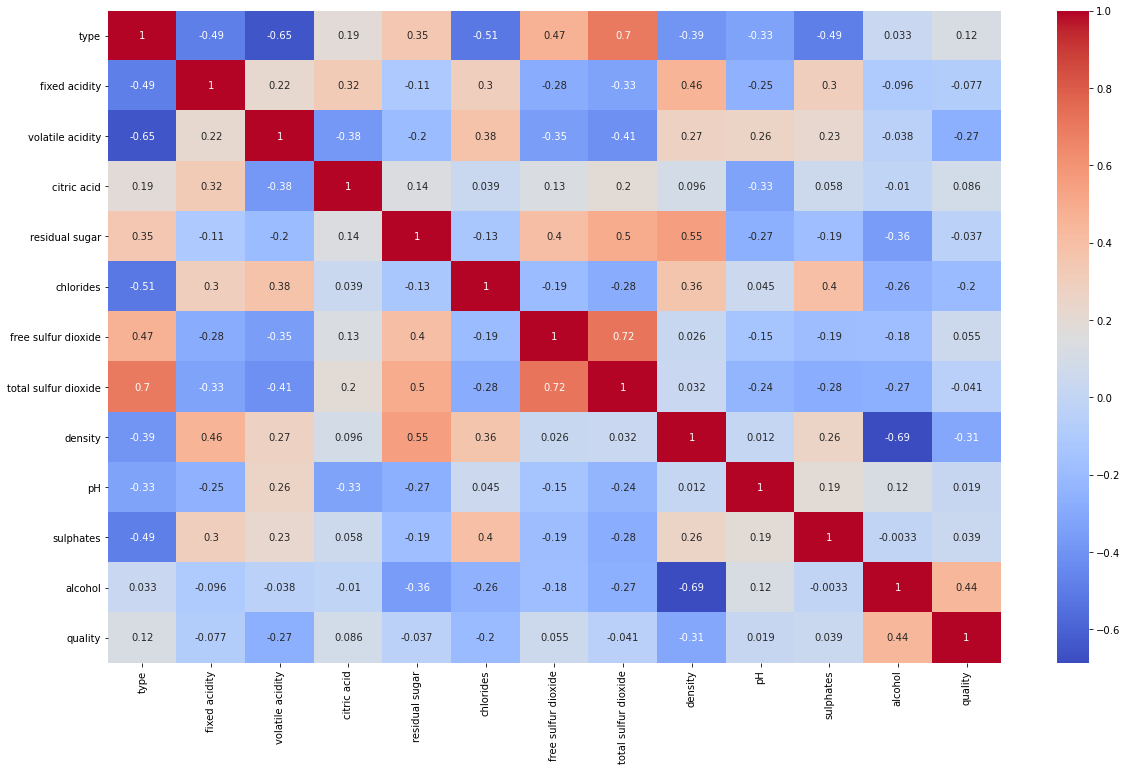

In [9]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap="coolwarm")

## From correlation matrix we can see that alcohol has the biggest positive impact on quality, while density has the biggest negative impact. We can also see that there is big negative correlation between "alcohol" and "density". The same situation is with "free sulfur dioxide"-"total sulfur dioxide" and "type"-"total sulfur dioxide". "density" and "type" also have correlations with the target, while "free sulfur dioxide" doesn't have big correlation, so we could try to remove that feautute, but we are solving classification task, not regression, so no need to worry about correlations.

### Boxplots

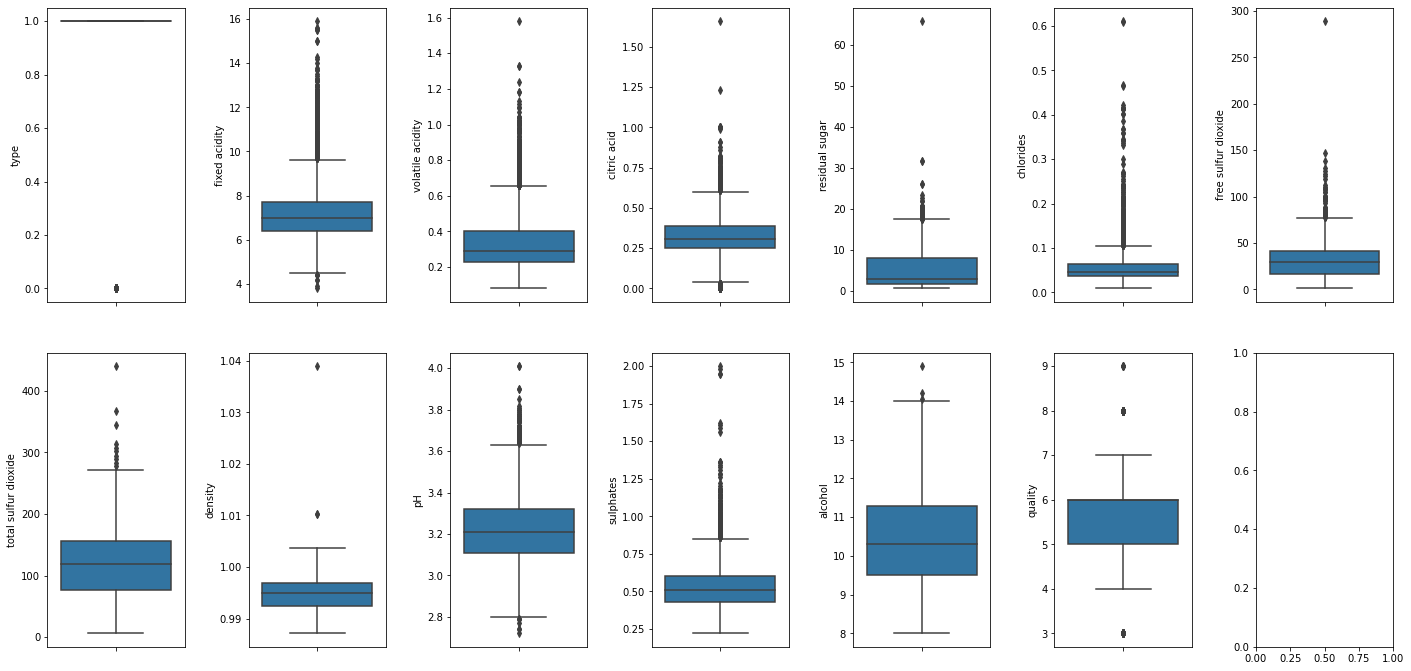

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

### Now we can see that there are outlayers in some columns` "citric acid", "residual sugar" and "chlorides". We need to remove those outlayers to get more accurate predictions.

In [11]:
df = df[df["citric acid"] < 1.5]
df = df[df["residual sugar"] < 60]
df = df[df["chlorides"] < 0.6]
df = df[df["free sulfur dioxide"] < 250]
df = df[df["density"] < 1.02]

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


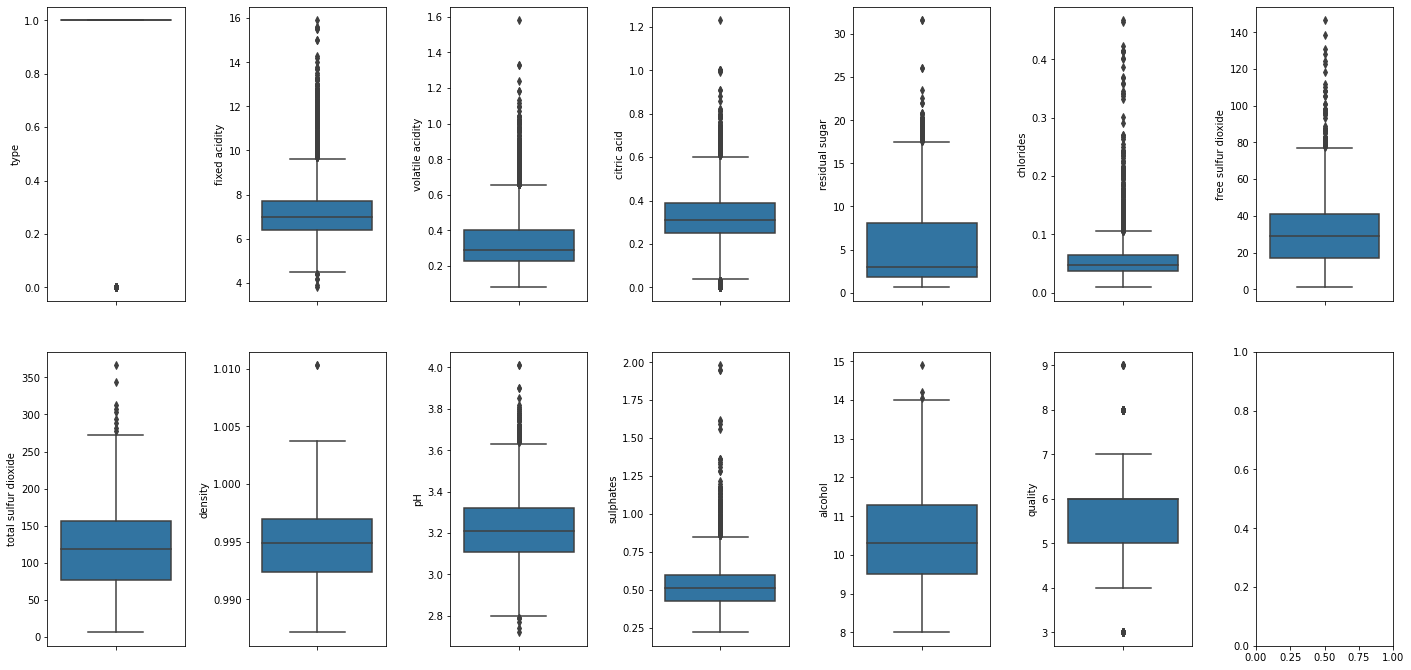

In [12]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

### There still seem to be some outlayer in density, so we will remove it too.

In [13]:
df = df[df["density"] < 1.005]

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


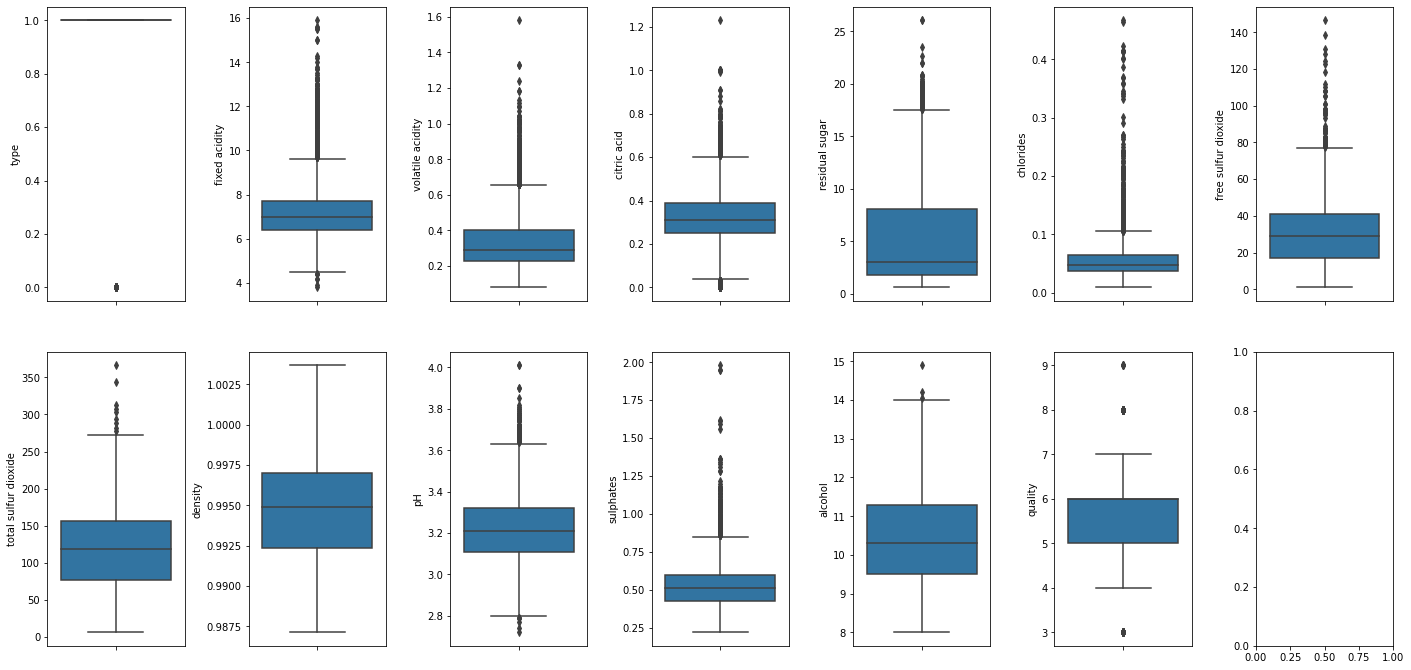

In [14]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

### So, we lose only 7 rows, but have much better results.

### Distributin plots

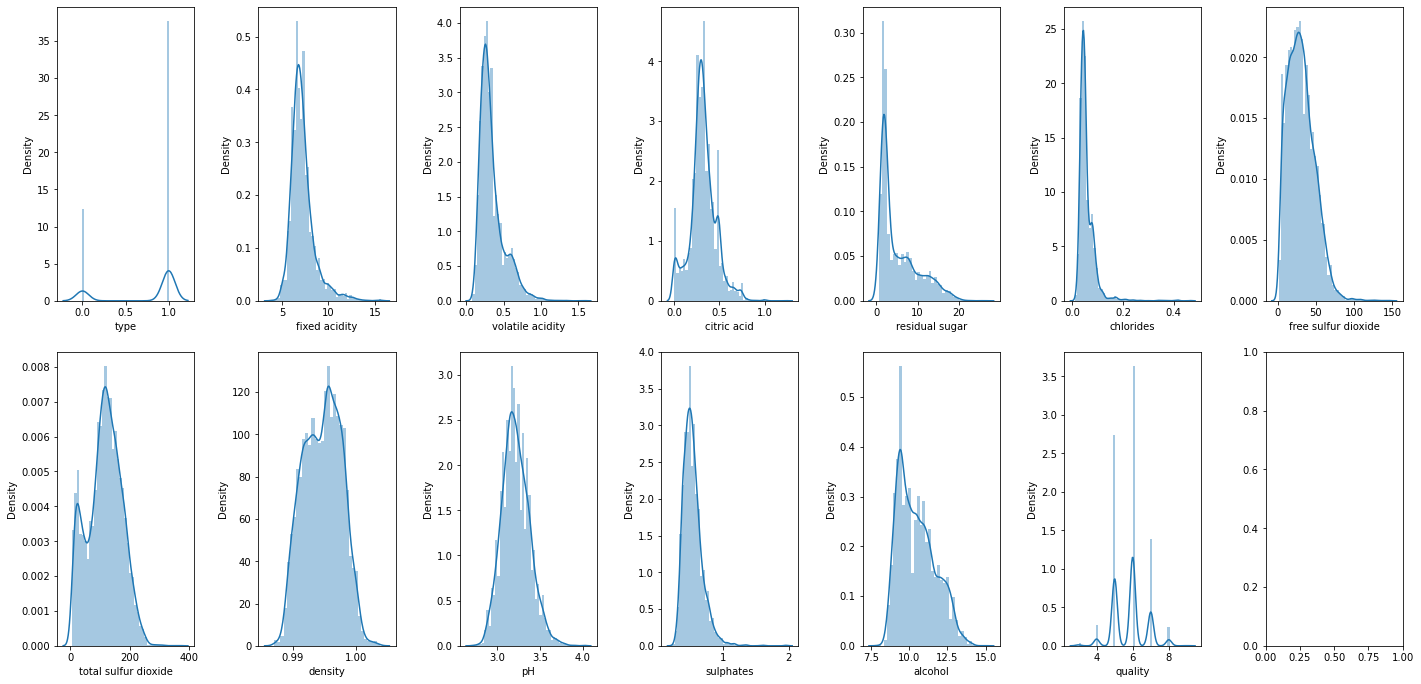

In [15]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

### As we can see all the columns almost have normal distribution, except "qulaity", which is not important. But there are still some problems with outlayers, so we need to remove more values.

In [16]:
df = df[df["volatile acidity"] < 1.1]
df = df[df["citric acid"] < 0.85]
df = df[df["residual sugar"] < 22]
df = df[df["chlorides"] < 0.25]
df = df[df["total sulfur dioxide"] < 320]
df = df[df["sulphates"] < 1.3]
df = df[df["free sulfur dioxide"] < 125]

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


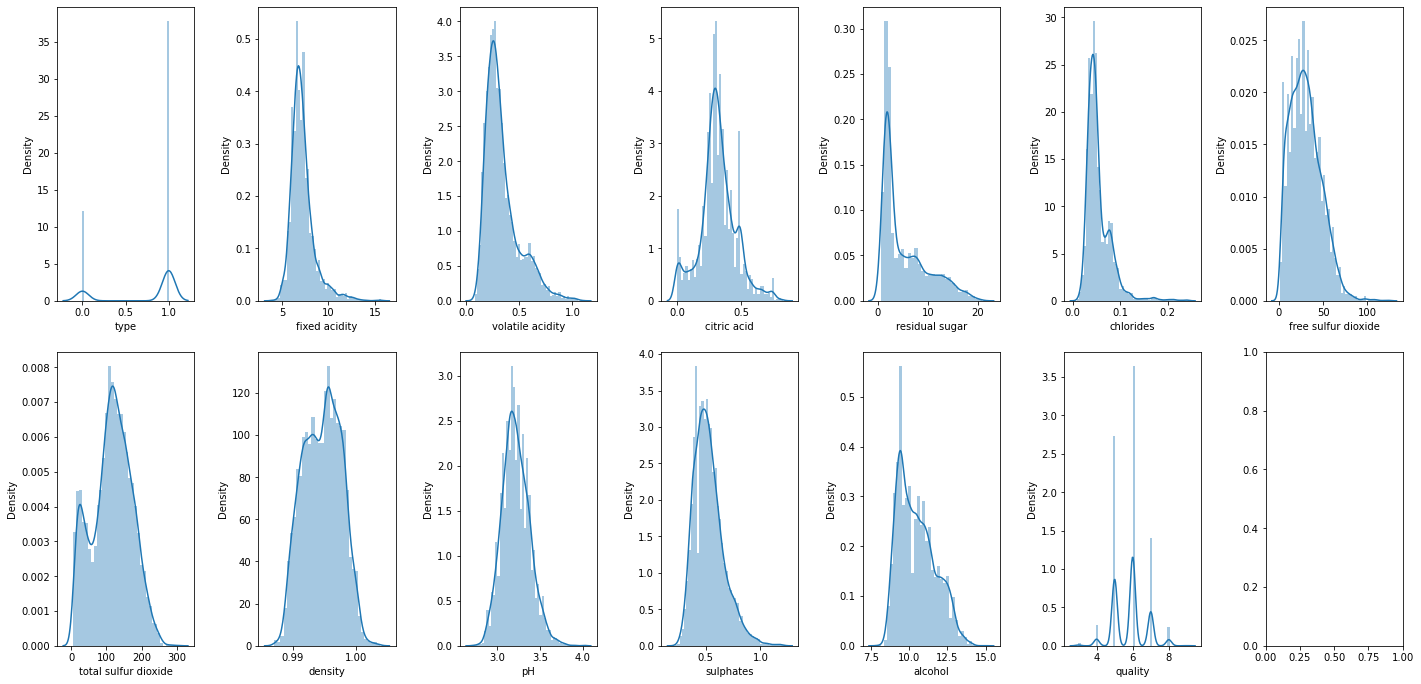

In [17]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

### We lose 76 rows, which isn't a very big data, as the dataset is pretty big, but now we have completely solved the problem of outlayers.

## Getting some additional info about the data

### Checking how many classes we have.

<AxesSubplot:xlabel='quality', ylabel='count'>

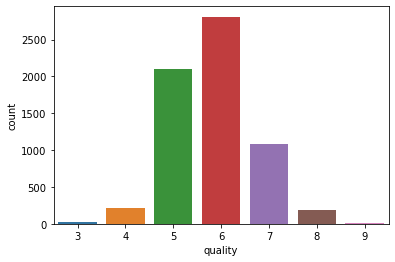

In [18]:
sns.countplot(df["quality"])

In [19]:
df["quality"].value_counts()

6    2810
5    2103
7    1077
4     209
8     193
3      24
9       5
Name: quality, dtype: int64

## Dividing data into training and testing parts. Training part will also have validation part in it. We will do it by splitting it by classifiers and then combining them.

In [20]:
df_3 = df[df["quality"] == 3]
df_4 = df[df["quality"] == 4]
df_5 = df[df["quality"] == 5]
df_6 = df[df["quality"] == 6]
df_7 = df[df["quality"] == 7]
df_8 = df[df["quality"] == 8]
df_9 = df[df["quality"] == 9]

columns = df.columns.to_list()
columns.remove("quality")

In [21]:
train_X_3, test_X_3, train_y_3, test_y_3 = train_test_split(df_3[columns], df_3["quality"], test_size=0.15, random_state=100)
train_X_4, test_X_4, train_y_4, test_y_4 = train_test_split(df_4[columns], df_4["quality"], test_size=0.15, random_state=100)
train_X_5, test_X_5, train_y_5, test_y_5 = train_test_split(df_5[columns], df_5["quality"], test_size=0.15, random_state=100)
train_X_6, test_X_6, train_y_6, test_y_6 = train_test_split(df_6[columns], df_6["quality"], test_size=0.15, random_state=100)
train_X_7, test_X_7, train_y_7, test_y_7 = train_test_split(df_7[columns], df_7["quality"], test_size=0.15, random_state=100)
train_X_8, test_X_8, train_y_8, test_y_8 = train_test_split(df_8[columns], df_8["quality"], test_size=0.15, random_state=100)
train_X_9, test_X_9, train_y_9, test_y_9 = train_test_split(df_9[columns], df_9["quality"], test_size=0.15, random_state=100)

In [22]:
train_X = pd.concat([train_X_3, train_X_4, train_X_5, train_X_6, train_X_7, train_X_8, train_X_9])
test_X = pd.concat([test_X_3, test_X_4, test_X_5, test_X_6, test_X_7, test_X_8, test_X_9])
train_y = pd.concat([train_y_3, train_y_4, train_y_5, train_y_6, train_y_7, train_y_8, train_y_9])
test_y = pd.concat([test_y_3, test_y_4, test_y_5, test_y_6, test_y_7, test_y_8, test_y_9])

In [23]:
train_y.value_counts()

6    2388
5    1787
7     915
4     177
8     164
3      20
9       4
Name: quality, dtype: int64

### We can see that there is a problem of balancing the classes, as there are 3 main classes that meet most in the dataset, while the others meet very rarely. So now we will do class imbalancement for training data.

In [25]:
oversample = SMOTE(k_neighbors=3)

train_X, train_y = oversample.fit_resample(train_X, train_y)

In [26]:
train_y.value_counts()

9    2388
8    2388
7    2388
6    2388
5    2388
4    2388
3    2388
Name: quality, dtype: int64

# Models

### We will compare three classification models` Logistic Regression, Decission Tree Classifier, SVM and KNN. To get the results in the maximum right way, we will split the data into training and testing parts, and testing part won't be touched until we decide which is our final model. Then will split training to training and validation, so we will compare rrsults from different models and in the we will se what accuracy our final model gives.

## Training

## Logistic regression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.15,random_state=109) 

param_grid = {"penalty": ["l1", "l2", "elasticnet", "none"],
            "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "multi_class": ["auto", "ovr", "multinomial"]}

grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=6, n_jobs=2)
lr_clf = grid_search.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

In [28]:
lr_score = lr_clf.score(X_test, y_test)
lr_score

0.4820574162679426

In [29]:
confusion_matrix(y_test, y_pred)

array([[139,  63,  35,  61,   1,  38,  26],
       [ 50, 176,  71,  22,  19,   6,   0],
       [ 55,  84, 165,  31,   9,  17,   0],
       [ 45,  32,  71,  86,  61,  68,   9],
       [ 23,  12,  26,  42, 101, 132,   6],
       [ 11,   6,  32,  22,  87, 190,  26],
       [  0,   0,   0,   0,   0,   0, 352]])

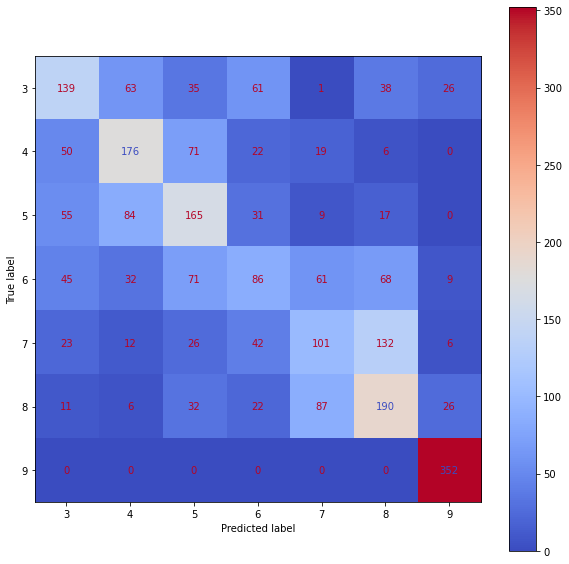

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr_clf, X_test, y_test, ax=ax, cmap="coolwarm")

## Random Forest

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.15,random_state=109) 

param_grid = {"n_estimators": range(2, 20),
            "criterion": ["gini", "entropy"],
            "min_samples_split": range(2, 5)}
                            
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=6, n_jobs=2)
rf_clf = grid_search.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [33]:
rf_score = rf_clf.score(X_test, y_test)
rf_score

0.8831738437001595

In [34]:
confusion_matrix(y_test, y_pred)

array([[363,   0,   0,   0,   0,   0,   0],
       [  1, 331,   7,   4,   1,   0,   0],
       [  2,  24, 271,  51,  10,   3,   0],
       [  5,  10,  63, 231,  57,   6,   0],
       [  1,   1,   1,  30, 302,   7,   0],
       [  0,   0,   0,   3,   6, 365,   0],
       [  0,   0,   0,   0,   0,   0, 352]])

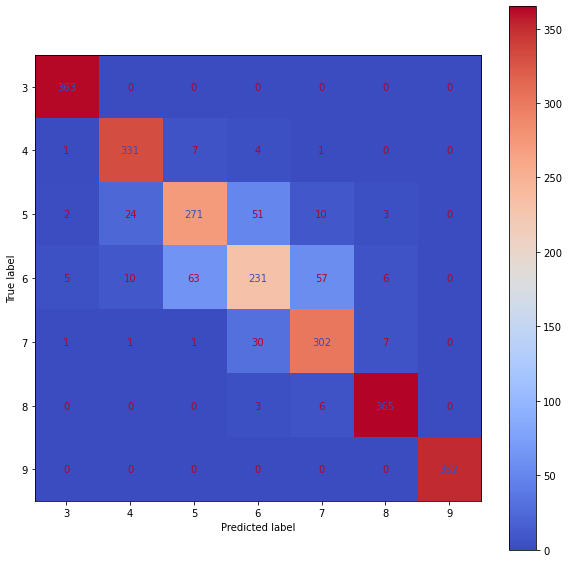

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax, cmap="coolwarm")

## SVM

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.15,random_state=109) 
norm = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]}
                            
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=6, n_jobs=2)
svm_clf = grid_search.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

In [38]:
svm_score = svm_clf.score(X_test, y_test)
svm_score

0.6921850079744817

In [39]:
confusion_matrix(y_test, y_pred)

array([[343,  11,   8,   0,   0,   1,   0],
       [  4, 269,  43,  18,   7,   3,   0],
       [ 25,  72, 198,  49,  10,   7,   0],
       [ 20,  28,  84, 104,  91,  44,   1],
       [  3,   8,  12,  47, 200,  72,   0],
       [  0,   8,   1,   8,  85, 270,   2],
       [  0,   0,   0,   0,   0,   0, 352]])

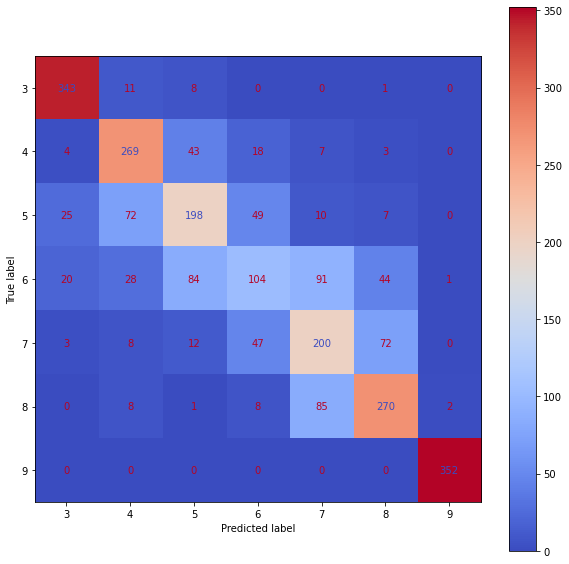

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm_clf, X_test, y_test, ax=ax, cmap="coolwarm")

## KNN

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.15, random_state=109) 

param_grid = {"n_neighbors": range(3, 6),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
                            
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, n_jobs=2)
knn_clf = grid_search.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

In [42]:
knn_score = knn_clf.score(X_test, y_test)
knn_score

0.8624401913875598

In [43]:
confusion_matrix(y_test, y_pred)

array([[360,   0,   1,   2,   0,   0,   0],
       [  0, 336,   2,   4,   2,   0,   0],
       [ 11,  18, 252,  50,  21,   9,   0],
       [ 13,  19,  60, 193,  57,  26,   4],
       [  1,   5,   3,  16, 309,   7,   1],
       [  1,   0,   1,   5,   5, 361,   1],
       [  0,   0,   0,   0,   0,   0, 352]])

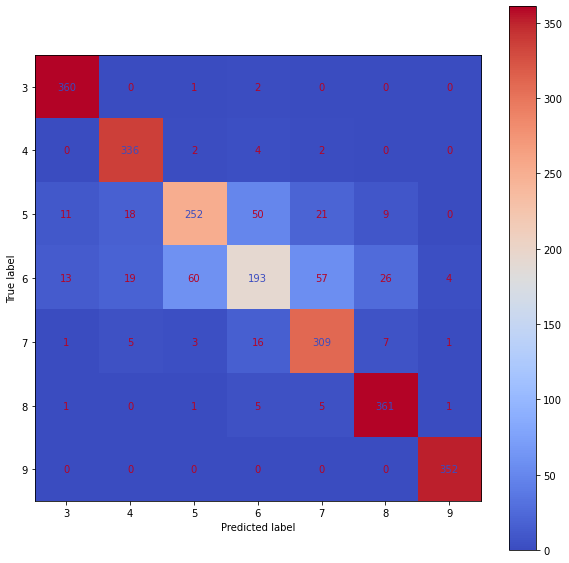

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn_clf, X_test, y_test, ax=ax, cmap="coolwarm")

### We see that Random Forest gives the best result, then comes KNN, then SVM and Logistic regression gives the worst accuracy. Now let's check to see whether we will get the same order of models when making predictions for the test data.

# Final models

## Logistic regression

In [49]:
param_grid = {"penalty": ["l1", "l2", "elasticnet", "none"],
            "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "multi_class": ["auto", "ovr", "multinomial"]}
                            
grid_search = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=6, n_jobs=2)
f_lr_clf = grid_search.fit(train_X, train_y)

pred_y = f_lr_clf.predict(test_X)

In [57]:
f_lr_score = f_lr_clf.score(test_X, test_y)
f_lr_score

0.2898550724637681

In [58]:
confusion_matrix(test_y, pred_y)

array([[  0,   1,   3,   0,   0,   0,   0],
       [  4,  13,  11,   4,   0,   0,   0],
       [ 13,  53, 160,  64,  21,   5,   0],
       [ 17,  33, 111, 130,  87,  44,   0],
       [  2,   4,   9,  47,  56,  44,   0],
       [  0,   1,   0,   2,  10,  16,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

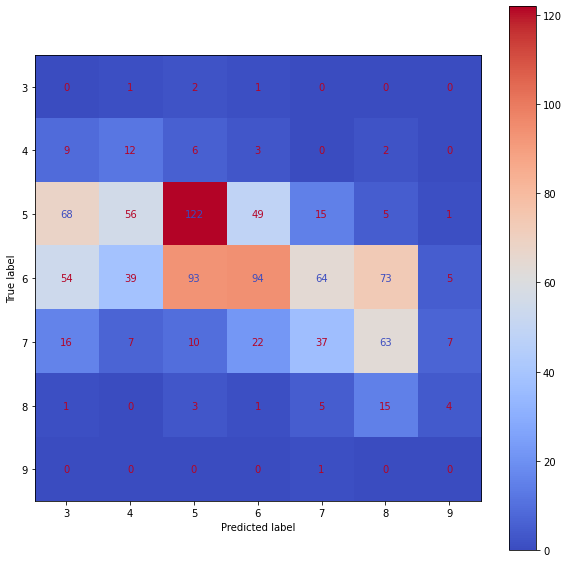

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(f_lr_clf, test_X, test_y, ax=ax, cmap="coolwarm")

## Random Forest

In [45]:
param_grid = {"n_estimators": range(2, 20),
            "criterion": ["gini", "entropy"],
            "min_samples_split": range(2, 5)}
                            
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=6, n_jobs=2)
f_rf_clf = grid_search.fit(train_X, train_y)

pred_y = f_rf_clf.predict(test_X)

In [46]:
f_rf_score = f_rf_clf.score(test_X, test_y)
f_rf_score

0.6211180124223602

In [47]:
confusion_matrix(test_y, pred_y)

array([[  0,   0,   2,   2,   0,   0,   0],
       [  0,  12,  13,   7,   0,   0,   0],
       [  2,  16, 215,  73,   8,   2,   0],
       [  1,   9,  78, 265,  60,   9,   0],
       [  0,   0,   9,  50,  94,   9,   0],
       [  0,   0,   0,   5,  10,  14,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

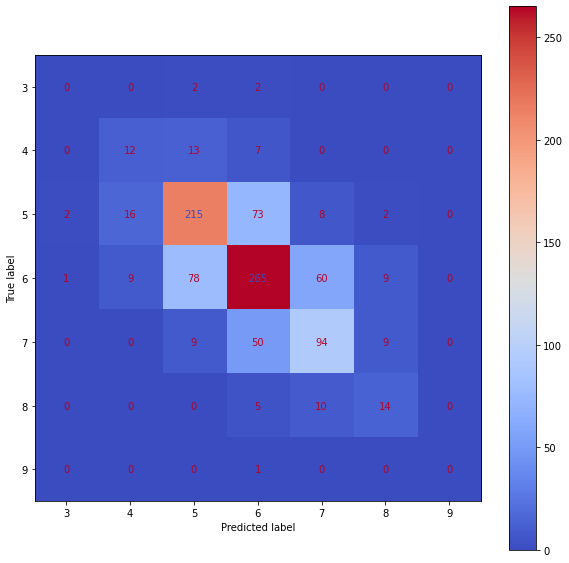

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(f_rf_clf, test_X, test_y, ax=ax, cmap="coolwarm")

## SVM

In [53]:
norm = MinMaxScaler().fit(train_X)

n_train_X = pd.DataFrame(columns = train_X.columns, data = norm.transform(train_X))
n_test_X = pd.DataFrame(columns = test_X.columns, data = norm.transform(test_X))

param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]}
                            
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=6, n_jobs=2)
f_svm_clf = grid_search.fit(n_train_X, train_y)

pred_y = f_svm_clf.predict(n_test_X)

In [54]:
f_svm_score = f_svm_clf.score(n_test_X, test_y)
f_svm_score

0.38819875776397517

In [55]:
confusion_matrix(test_y, pred_y)

array([[  0,   1,   3,   0,   0,   0,   0],
       [  4,  13,  11,   4,   0,   0,   0],
       [ 13,  53, 160,  64,  21,   5,   0],
       [ 17,  33, 111, 130,  87,  44,   0],
       [  2,   4,   9,  47,  56,  44,   0],
       [  0,   1,   0,   2,  10,  16,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

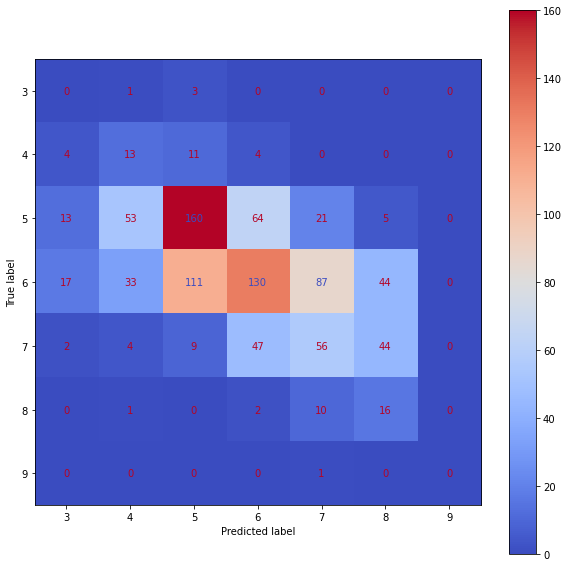

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(f_svm_clf, n_test_X, test_y, ax=ax, cmap="coolwarm")

## KNN

In [60]:
param_grid = {"n_neighbors": range(3, 6),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
                            
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, n_jobs=2)
f_knn_clf = grid_search.fit(train_X, train_y)

y_pred = f_knn_clf.predict(test_X)

In [61]:
f_knn_score = f_knn_clf.score(test_X, test_y)
f_knn_score

0.5341614906832298

In [62]:
confusion_matrix(test_y, pred_y)

array([[  0,   1,   3,   0,   0,   0,   0],
       [  4,  13,  11,   4,   0,   0,   0],
       [ 13,  53, 160,  64,  21,   5,   0],
       [ 17,  33, 111, 130,  87,  44,   0],
       [  2,   4,   9,  47,  56,  44,   0],
       [  0,   1,   0,   2,  10,  16,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

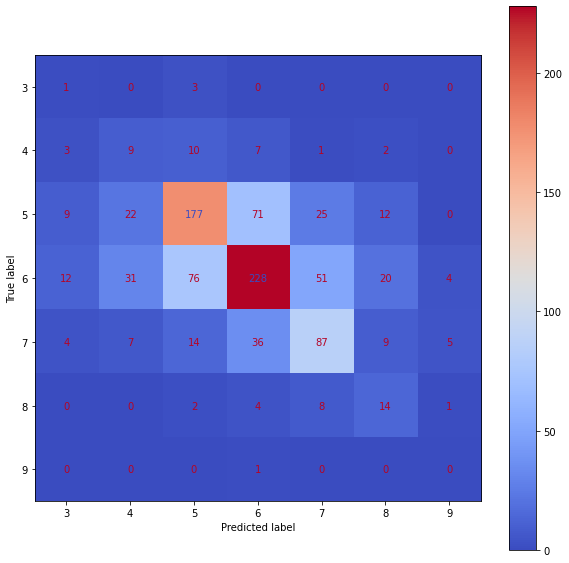

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(f_knn_clf, test_X, test_y, ax=ax, cmap="coolwarm")

### Comparison of results

In [65]:
results = {
    "Logistic regression": [lr_score, f_lr_score],
    "Random Forest": [rf_score, f_rf_score],
    "SVM": [svm_score, f_svm_score],
    "KNN": [knn_score , f_knn_score]
}

table = pd.DataFrame.from_dict(results, orient="index", columns=["Validation set accuracy", "Testing set accuracy"])
table

,Validation set accuracy,Testing set accuracy
Logistic regression,0.482057,0.289855
Random Forest,0.883174,0.621118
SVM,0.692185,0.388199
KNN,0.862440,0.534161


### The order of results is the same as in training process.

# Report

-> EDA and Future Selection

- After importing the data we noticed that there is only one column with string values, so we changed it into numerical values so that later it can be used in proccess of training our model.
- There were also some "nan" values in the dataset, which were substitued by mean values of each column.
- Later we created correlation matrix, which gave us some correaltions between the feautures but we didn't touch any future as we decided to do classification task and not regression.
- After with help of boxplotes and distribution plots we removed some rows from the dataset which were containing some outlayers.
- With all these steps we fineished EDA and preprocessing of our data.

-> Class Imbalancement

Tha data still hade some problems, as there was a huge class imbalancement, so first we splitted the data to training and testing parts, which we didn't do in a classical way, but first splitted the data based on classes and then combined them, because if we did the split in traditional way, some classes which had very low number of observations, might have moved to training data and be absent from testing data.

After it we did class embalancement for training data, so that our model would be trained in a better way.

-> Training and testing

Four models were selected for the classification task and here are results in order of accuracy`

- Logistic Regression` 0.2898550724637681
- SVM` 0.38819875776397517
- KNN` 0.5341614906832298
- Random Forest` 0.6211180124223602

-> Explanation of results

- Logistic Regression

Logistic regression is mostly used for making predictions for binary classes, so it is not good for multiclass classification problems. For multiclass problems it uses Softmax function instead of Sigmoid. The issue with Softmax function is that it blows small differences out of proportion which makes our classifier biased towards a particular class which is not desired. Now, same be said of the Sigmoid function but in case of binary classification we will ultimately reach the optimum point.

- SVM

In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems. This leads to more mistakes, it still works better than Logistic Regression, but can't reach the level of results that Random Forest and KNN gave in this case

- KNN

KNN is very suitable for multiclass classification. KNN does not require any specific assumptions. It works on all kinds of data on which the classification is to be performed. It is very simple model which is based on counting the distance between points, no matter how many classes there are, so in this case it gave us pretty good results and has the 2nd rank between the models we have considered.

- Random Forest

Random Forest is one of the models for multiclass classification and we also saw it in our problem. Just like KNN it doesn't matter how many classes we have, the algorithm can separate the data into as many parts as needed, but unlike KNN some harder logic is implemented in Random Forest, where Gini index or entropy is counted, and then by getting results from different trees "votes" are counted and best result is given, so making Random Forest the best algorithm of the 4 ones we have chosen.